In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import scipy.signal as signal



# Sine-Wave Analysis

220


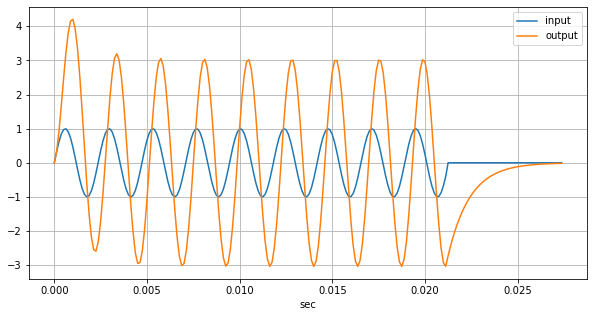

In [44]:
fs = 8000       # sampling rate (F)
dur = 1         # duration, 1 second
f0 = 423        # frequency to generate, you can change the frequency 


# input
x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

x_segment = x[:170]
x_segment = np.append(x_segment, np.zeros(50))

# delayed output
b1 = [1]
a1 = [1, -0.9]
y1 = signal.lfilter(b1,a1,x_segment)

print(len(y1))

plt.figure(figsize=(10, 5))

L = len(x_segment)
n= np.arange(L)
plt.plot(n/fs, x_segment[:L])
plt.plot(n/fs, y1[:L])
plt.grid(True)
plt.xlabel('sec')

plt.legend(['input','output'])


# Frequency Response

Text(0.5, 0, 'Frequency [rad/sample]')

<Figure size 720x360 with 0 Axes>

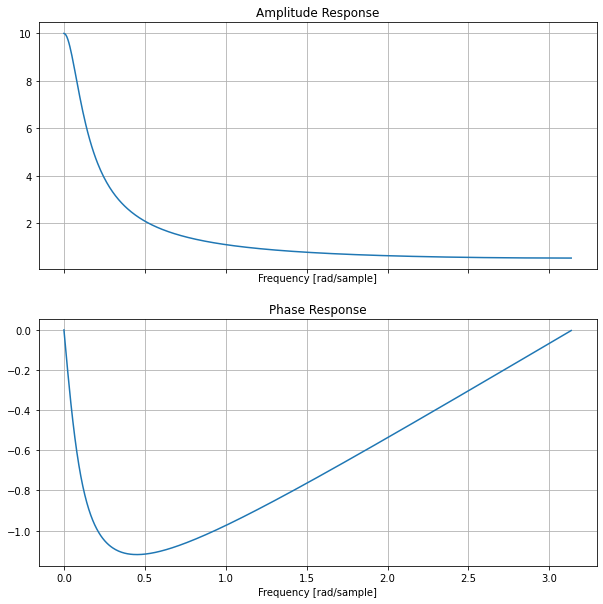

In [48]:
b1 = [1]
a1 = [1, -0.9]

w, h = signal.freqz(b1,a1)

plt.figure(figsize=(10, 5))

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,10))

ax[0].plot(w, np.abs(h))
ax[0].grid(True)
ax[0].set_title('Amplitude Response')
ax[0].set_xlabel('Frequency [rad/sample]')

ax[1].plot(w, np.angle(h))
ax[1].grid(True)
ax[1].set_title('Phase Response')
ax[1].set_xlabel('Frequency [rad/sample]')


# FIR Filters


In [49]:
x, sr = librosa.load("../audio/Snare.wav") 
#y, sr = librosa.load("../audio/white_noise.wav") 
print(sr)
ipd.Audio(x, rate=sr)


22050


### Leaky Integrator

In [67]:
b1 = [1]
a1 = [1, -0.9]

y1 = signal.lfilter(b1,a1,x)

print(sr)

ipd.Audio(y1, rate=sr)

22050


### Reson filter

In [75]:
r = 0.99
fc = 500
theta = 2*r*np.cos(fc/sr)

b2 = [1]
a2 = [1, -2*r*np.cos(fc/sr), r*r]

y2 = signal.lfilter(b2,a2,x)

ipd.Audio(y2, rate=sr)

### Feedback comb filter

In [108]:
M = 4000
a3 = np.zeros(M)
a3[0]= 1
a3[M-1] = -0.8
b3 = [1]

x1 = np.append(x, np.zeros(sr))

y3 = signal.lfilter(b3,a3,x1)

ipd.Audio(y3, rate=sr)
